   ApplicantIncome  LoanAmount  CreditHistory  Approved
0             5000         100              1         1
1             6000         150              0         0
2             7000         200              1         1
3             8000         250              1         1
4             9000         300              0         0
5            10000         350              1         1
6            11000         400              0         0
7            12000         450              1         1
8            13000         500              1         1
9            14000         550              0         0
Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Confusion Matrix

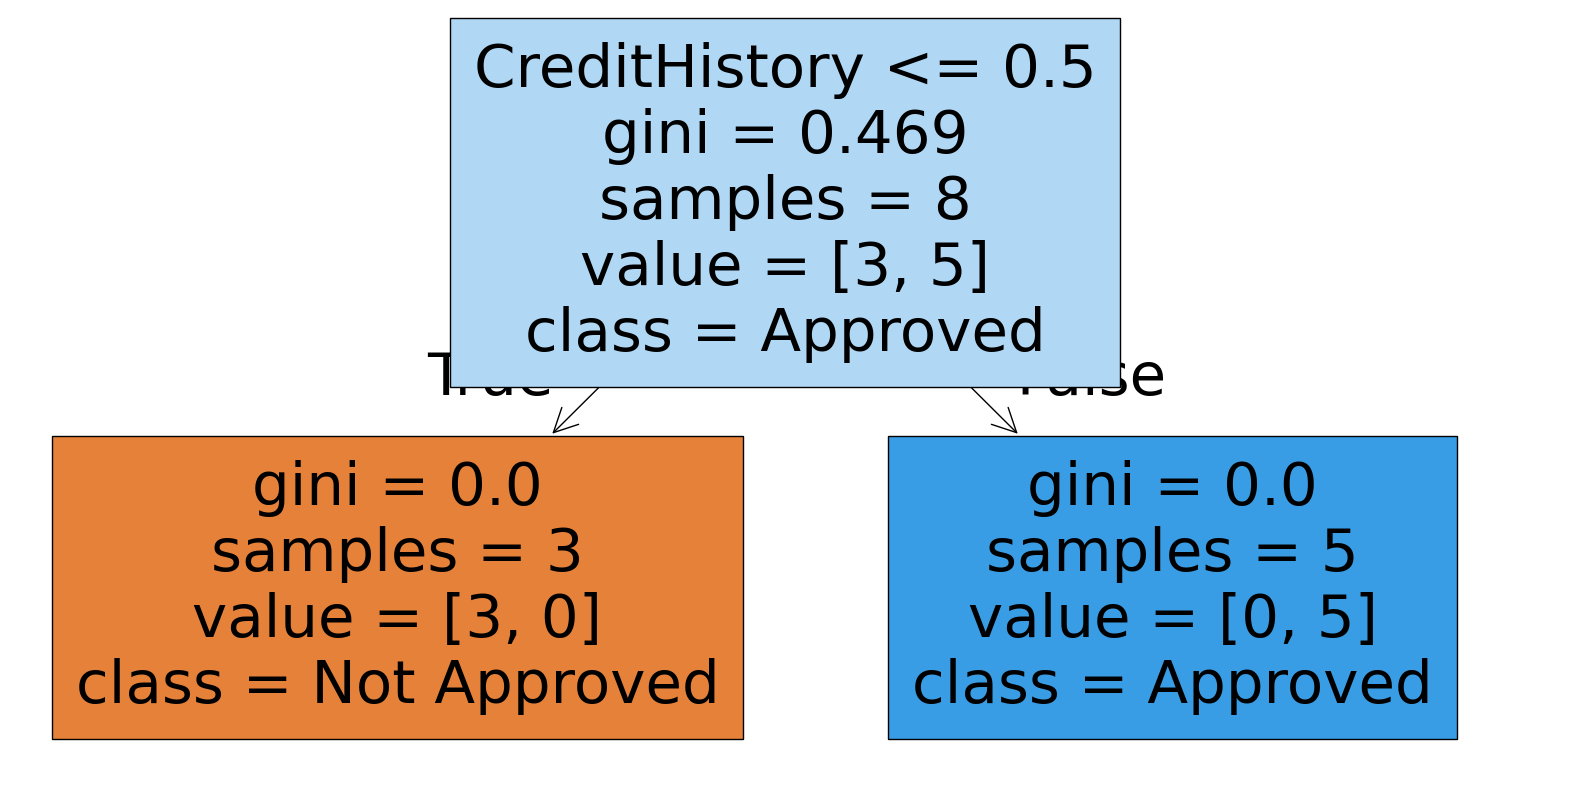

In [4]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import graphviz
from sklearn.tree import export_graphviz

# Step 1: Load and Preprocess the Dataset
# Example dataset
data = {
    'ApplicantIncome': [5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000],
    'LoanAmount': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550],
    'CreditHistory': [1, 0, 1, 1, 0, 1, 0, 1, 1, 0],
    'Approved': [1, 0, 1, 1, 0, 1, 0, 1, 1, 0]
}

# Convert the dataset into a DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df)

# Features and labels
X = df[['ApplicantIncome', 'LoanAmount', 'CreditHistory']]
y = df['Approved']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Create and Train the Decision Tree Model
# Create the decision tree classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Step 3: Make Predictions and Evaluate the Model
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 4: Predict for a New Applicant
# New applicant data
new_applicant = pd.DataFrame({
    'ApplicantIncome': [11500],
    'LoanAmount': [400],
    'CreditHistory': [1]
})

# Make prediction
new_prediction = model.predict(new_applicant)
print(f"Loan Approval Status: {'Approved' if new_prediction[0] else 'Not Approved'}")

# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['Not Approved', 'Approved'], filled=True)
plt.show()
